

# Project: Investigate of No-Show Appoiment Dataset

## Table of Contents
<ul>
    
<li><a href="#intro">Introduction</a></li>
    
<li><a href="#wrangling">Data Wrangling</a></li>
    <ol><a href="#review" >Review of Dataset</a></ol><ol><a href="#clean" >Cleaning of Dataset</a></ol>

<li><a href="#eda">Exploratory Data Analysis</a></li>
    
<li><a href="#conclusions">Conclusions</a></li>

</ul>




<a id='intro'></a>
## Introduction

### No Show Appointment 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
‘No-Show’ indicating if the patient came for the appointment or not. the response ‘No’ implies the patient showed up to their appointment, with ‘Yes’ implies they did not show up.

I will be analysing the dataset to identify the major influence to a patient showing up for his or her appointment as scheduled.


### Question(s) for Analysis
1.What proportion of patience showed up for there appointment?   
2.How does age after the rate of patients showing up for appointment?  
3.Does location influece the patient's attendance?   
4.Does receiver of SMS contribute to the attendance ratio of Patients?   
5.Does ailment collectively affect if the patient shows up?




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

<a id='review'></a>
### A General Overview of the Dataset Properties

In [3]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(4)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No


The data set is loaded into the work station, and reviewed displaying the first 4 columns. It is easily observed that some headers are not spelt correctly (eg. Hipertension, Handcap) and tend to take irregular patterns (eg. No-show which is different from SMS_received)

In [4]:
df.shape

(110527, 14)

The dimension of the dataset is checked.The above shows the dataset has 110527 rows and 14 columns

In [5]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The info method shows us that there are no null values in the data set.

In [7]:
df.duplicated().sum()

0

The above method returns the number of row with that were duplicated, apparently no row was duplicated.


In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The decription of the dataset seem good, except for the minimum age captured as -1 which is not practical.

<a id='clean'></a>
### Cleaning and addressing the exceptions observed  in the dataset 

In [9]:
df.rename(columns=lambda x: x.strip().lower().replace("-","_"),inplace=True)
df.head(0)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


In [10]:
df.rename(columns={'patientid':'patient_id','appointmentid':'appointment_id','scheduledday':'scheduled_day','appointmentday':'appointment_day','hipertension':'hypertension','handcap': 'handicap'},inplace=True)
df.head(0)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


The headers are coverted into regular pattern (all small letters and adopting '_' as the main separator) and the spelling errors were also corrected.

In [11]:
df.index[df["age"]== -1]

Int64Index([99832], dtype='int64')

The above is use to identify the column index with -1 in its age column.

In [12]:
df.drop(index=99832,inplace=True)
df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The row with the negative age (-1) is dropped from the dataset.

In [13]:
df.drop_duplicates(['patient_id','no_show'], inplace=True)
df.shape

(71816, 14)

The rows in the dataset was reduced using the Patient_id and the no_show as identifiers, this implies no single data row would have the same patient_id and no_show status.

In [14]:
df.drop(['patient_id','appointment_id','scheduled_day','appointment_day'],axis=1,inplace=True)
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The columns with data not relevant to the questions this analysis aims to answer were dropped.

In [15]:
df.nunique()

gender             2
age              103
neighbourhood     81
scholarship        2
hypertension       2
diabetes           2
alcoholism         2
handicap           5
sms_received       2
no_show            2
dtype: int64

The numbers of unique content in each columns/ headers are displayed.

In [16]:
df.shape

(71816, 10)

<a id='eda'></a>
## Exploratory Data Analysis

### Overview of dataset after cleaning on chart to determine which factor affected attendance

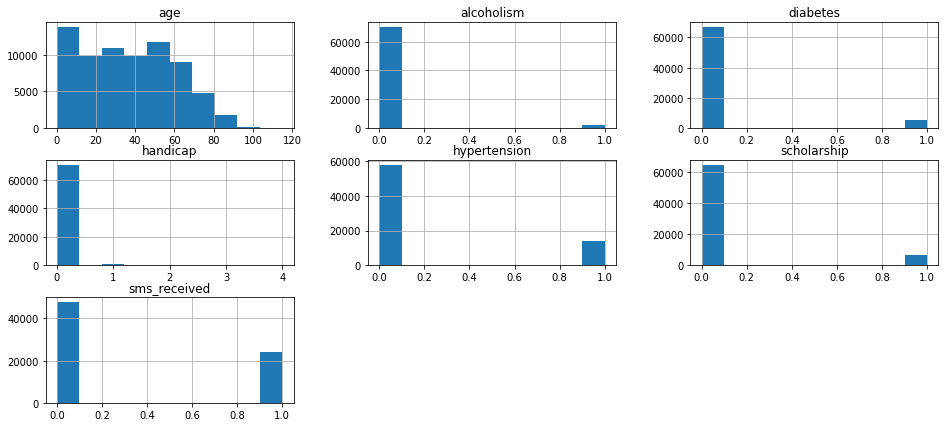

In [17]:
df.hist(figsize=(16,7));

7 histogram chart are presented because we have 7 column in the dataset with numerical values which were plot is against the frequency of occurrence.

From the histograms above, we can deduce factors with greater chances of influencing if a Patient show up or fails to show up.

The number of patients that have alcohol issues and those that are handicap are not large enough to greatly influence the number of patient that show up or not 

Emphasis would be placed on the influence of age, ailment ( hypertension and diabetes) ,scholarship, receiver of SMS.

### Research Question 1 - What proportion of patience showed up for there appointment ?

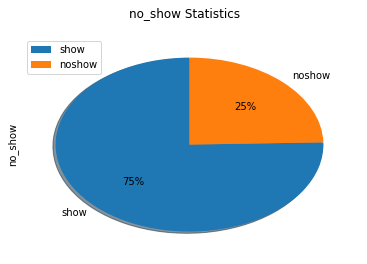

In [18]:
# divinding tthe grow into two categories no and no_shnow 
show= df.no_show=='No'
noshow= df.no_show=='Yes'
subjects= ['show', 'noshow']
df.no_show.value_counts().plot(kind='pie',subplots=True,shadow = True,startangle=90, autopct='%1.0f%%', title='no_show Statistics', labels= subjects )
plt.legend();


After cleaning the dataset , A review shows 3 in 4 patients show up for their appointment. This implies an estimate of 25% of Patients do no attend there appointment after  scheduling.

In [19]:
# Defining the Functions used in this analysis
#Analysis_NumObjects - Analysis of Numberical Objects Types
#Analysis_NonNumObjects - Analysis of Non - Numberical Objects Types 

def Analysis_NumObjects (df,header,attended, absent):
 
    plt.figure(figsize=[16,5])
    df[header][show].hist(alpha=.5 , bins=10,color='blue', label='show')
    df[header][noshow].hist(alpha=.5 , bins=10,color='red', label='noshow')
    plt.legend();
    plt.title( 'Effect of '+ header+' on Patient Number')
    plt.xlabel(header)
    plt.ylabel('Patients Count');



def Analysis_NonNumObjects (df,header,attended, absent):
 
    plt.figure(figsize=[16,5])
    df[header][show].value_counts().plot(kind='bar', alpha=.5 , color='blue', label='show')
    df[header][noshow].value_counts().plot(kind='bar', alpha=.5 ,color='red', label='noshow')
    plt.legend();
    plt.title( 'Effect of '+ header+' on Patient Number')
    plt.xlabel(header)
    plt.ylabel('Patients Count');
    


The above are functions adopted for this analysis to avoid repetition of codes.

### Research Question 2 - How does age after the rate of patients showing up for appointment?

In [20]:
# Evaluating the ava=erage age of Patient based on Show  up status
print ('Average show age',df.age[show].mean().round(2),'\nAverage noshow age',df.age[noshow].mean().round(2))

Average show age 37.23 
Average noshow age 34.38


 The changes that exist between the average age of patients that showed for their appointment varies litle from those that disinot show up.

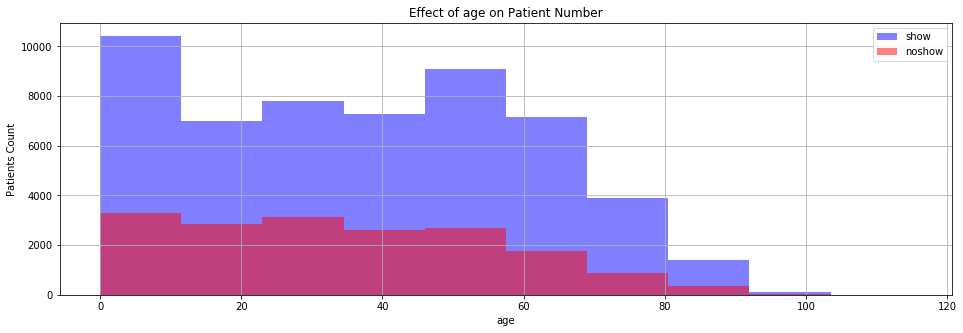

In [21]:
Analysis_NumObjects(df,'age',show, noshow)

The differents between the average age of patients that show up is less than 3 years from those that fail to show up, which is a small margin.

The table shows Patients under 10 years has the most show rate , this is followed by patient within the age of 45 to 58 while a steady decline is experience from 70 years onward, this could be as a result of small numbers of people living in such age bracket, which is above the average mortality age in the world.


The diagram shows majority of patients that attended their appointment were under 10 years old, these category are usually under parents or guardians supervision.

### Research Question 2 - Does gender distribution affect if the patient shows up?

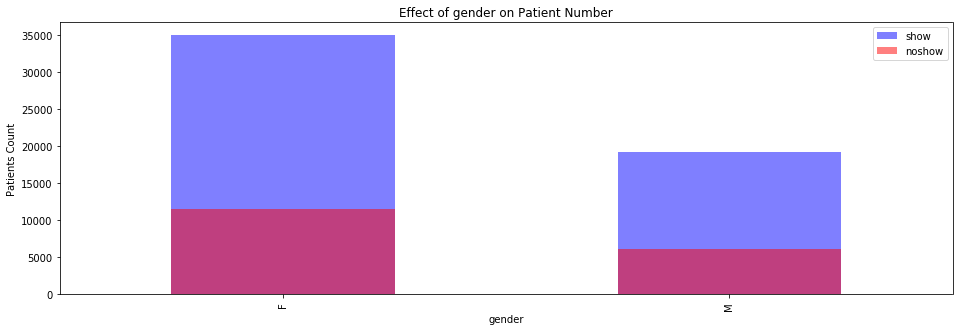

In [22]:
Analysis_NonNumObjects(df,'gender',show, noshow)

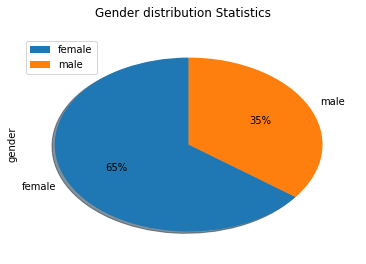

In [23]:
subjects= ['female', 'male']
df.gender.value_counts().plot(kind='pie',subplots=True,shadow = True,startangle=90, autopct='%1.0f%%', title='Gender distribution Statistics', labels= subjects )
plt.legend();

In [24]:
print ('show -',df[show].groupby('gender').age.mean(),
       '\nnoshow -',df[noshow].groupby('gender').age.mean())


show - gender
F    39.130292
M    33.766269
Name: age, dtype: float64 
noshow - gender
F    36.06501
M    31.22040
Name: age, dtype: float64


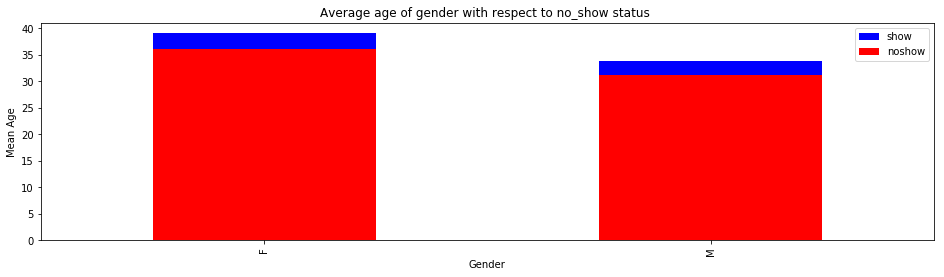

In [25]:
plt.figure(figsize=[16,4])
df[show].groupby('gender').mean()['age'].plot(kind='bar',color='blue', label='show')
df[noshow].groupby('gender').mean()['age'].plot(kind='bar',color='red', label='noshow')
plt.legend();
plt.title( 'Average age of gender with respect to no_show status ')
plt.xlabel('Gender')
plt.ylabel('Mean Age');

#### The chart above relates the gender of patients to the average average of patients.


Considering the proportion of Female to Male in the dataset, there is no notable influence of gender on the patients attending his or her appointment, as the ratio of attendance to non - attendance is similar in both genders

### Research Question 3 - Does location influece the patient's attendance?

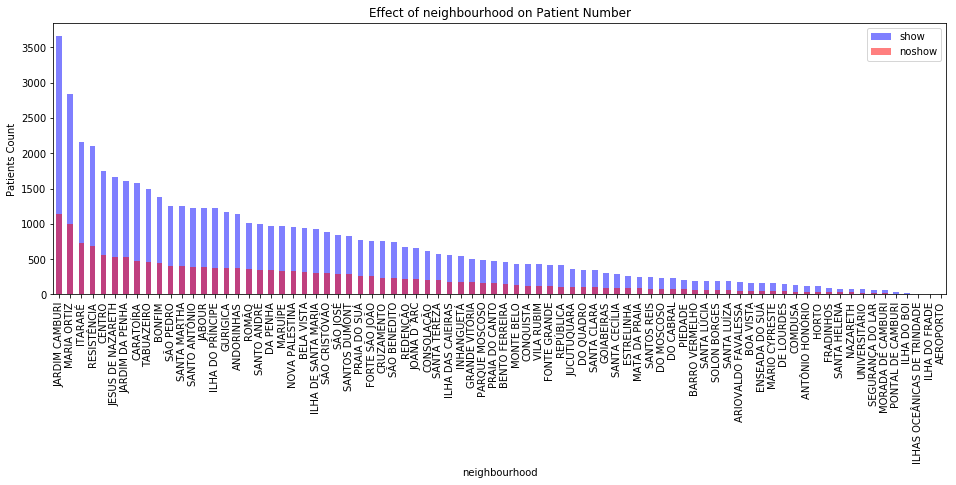

In [26]:
Analysis_NonNumObjects(df,'neighbourhood',show, noshow)

A study of the chart shows the graph tilting to the right, and clearly indicates the neighbourhood influeces the outcome of attendance.

Jardim Cameburi ,Maria Oritz ,Itatare respectively ,were the top three with highest contributors with respect to attendance.


### Research Question 4 - Does receiver of SMS contribute to the attendance ratio of Patients?

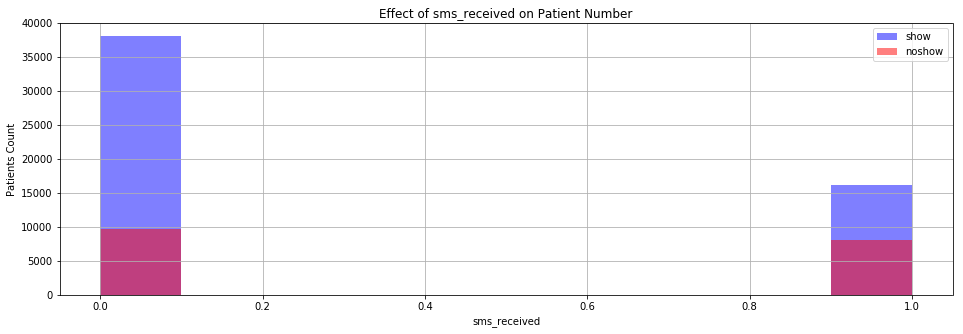

In [27]:
Analysis_NumObjects(df,'sms_received',show, noshow)

The graph aboves indicates the fraction of attendance without receiving sms reminders about their appointment is greater than those amount of patients that got sms, it can been seen that appoximately 50% of patients that got SMS didn't show up for there schedule appointment unlike those that didn't get SMS with attendance near 70 %.

### Research Question 5 -Does ailment collectively affect if the patient shows up?

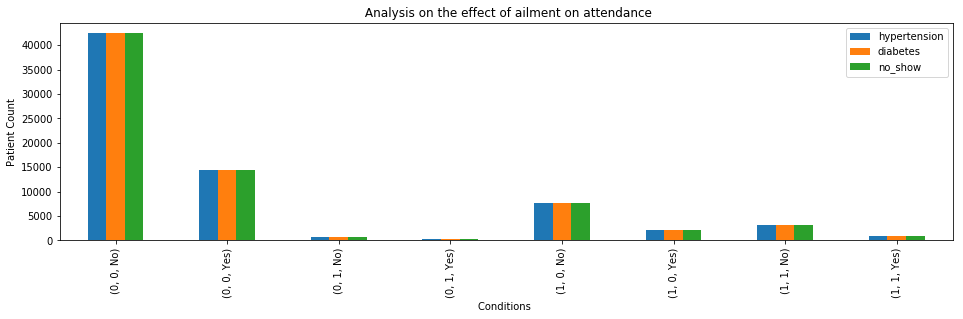

In [28]:
df.groupby(['hypertension', 'diabetes','no_show'])['hypertension', 'diabetes','no_show'].count().plot(kind='bar',figsize=[16,4], label='show');
plt.legend();

plt.title( ' Analysis on the effect of ailment on attendance')
plt.xlabel('Conditions ')
plt.ylabel('Patient Count');

The chart shows the Patients ailment had litle effect on the patients attending his or her appointment, as the threads of patients who had one or both major ailments (hypertension and diabete) that attended are similar to those  witout any form of ailment.

<a id='conclusions'></a>
## Conclusions

> Following the analysis the following can be deduce;
 Neigbourhood has a strong correclation with the number of patients that attends or don't. Its important to note that the neighbourhood also have relative level of attendance to non attendance with some neighbourhood having more patient than others, this can be as a result of proximity to the respective health facilities or the polulation of the neighbourhood.
 
>Age had a mild correlation to the number of patients that show up for appointment. It can be observes that the greatest fraction that attended their scheduled apoointment where Patients under the age of 10. The can be related to efforts of parents wanting to ensure their kids at this early stage are in good health, hence the greater number of attendance. 

> A comparism of data relating to SMS received and attendance, shows the inverse result are more patients attended without receiving SMS than those that received SMS, this implies sending SMS to get Patients to come for there appointment is not effieient and other methods is recommended other than sending SMS.

> There was no distint pattern observed relating to the influence of gender and ailment on the level of attendance.

Limitations - 

>The factors I identified had influence on a patient showing up posed more questions which the dataset does not provide. For example, why Jardim Cameburi neigbourhood which had the highest number of patient, it is because of its population or there are just many resident needing medical checks?

>The dataset was reduced considering two major factors ( the patient_id and the no_show status) , there is a possible that this might have affected some set of the data.

>Could not find correlation of some of the factor with respect to their influence of attendance.

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0